In [31]:
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plt settings. 
plt.rcParams["figure.dpi"] = 200
plt.rcParams.update({"font.size": 12})
plt.rcParams['figure.figsize'] = (8,5)

# Gaining intuition for our DAQ: 

* Would be cool to make this an interactive thing that someone could mess around with on github. Is that possible?
    * Make the phase, gain, such variable...

In [11]:
# Constants. 
PI = np.pi

## 1. FFT of noisy sin wave: 

In [51]:
@interact
def simple_fft(f = (0,1000/2,10), signal_amp = (0,10,1), noise_std = (0,10,1)): 

    # Discrete time axis. 
    signal_duration = 1
    fft_pts = 1000
    t = np.linspace(0, 1, fft_pts)

    # Create gaussian distributed noise with std noise_std. 
    noise = np.random.normal(0,noise_std,fft_pts)

    # Create signal.
    signal = signal_amp*np.sin(f * 2 * PI * t)

    # Add the noise. 
    signal = signal + noise
    
    fft = np.fft.fft(signal)
    T = t[1] - t[0]  # sampling interval 
    N = signal.size

    freq_axis = np.linspace(0, 1 / T, N)

    # Plot the signal and FFT
    fig, (ax1, ax2) = plt.subplots(2)
    
    ax1.set_title("Time Domain")
    ax1.set_ylabel("Amplitude")
    ax1.set_xlabel("Time [s]")
    ax1.plot(t, signal)
    
    ax2.set_ylabel("Amplitude")
    ax2.set_xlabel("Frequency [Hz]")
    ax2.bar(freq_axis[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1)  # 1 / N is a normalization factor
    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=250.0, description='f', max=500.0, step=10.0), IntSlider(value=5, desc…

## 2. FFT of noisy modulated sin wave: 

In [55]:
@interact
def simple_fft(f = (0,1000/2,10), signal_amp = (0,10,1),f_m = (0,60,5), h = (0,5,.1), noise_std = (0,10,1)): 

    # Discrete time axis. 
    signal_duration = 1
    fft_pts = 1000
    t = np.linspace(0, 1, fft_pts)

    # Create gaussian distributed noise with std noise_std. 
    noise = np.random.normal(0,noise_std,fft_pts)

    # Create signal.
    
    signal = signal_amp*np.sin(f * 2 * PI * t+ h*np.sin(f_m * 2 * PI * t))

    # Add the noise. 
    signal = signal + noise
    
    fft = np.fft.fft(signal)
    T = t[1] - t[0]  # sampling interval 
    N = signal.size

    freq_axis = np.linspace(0, 1 / T, N)

    # Plot the signal and FFT
    fig, (ax1, ax2) = plt.subplots(2)
    
    ax1.set_title("Time Domain")
    ax1.set_ylabel("Amplitude")
    ax1.set_xlabel("Time [s]")
    ax1.plot(t, signal)
    
    ax2.set_ylabel("Amplitude")
    ax2.set_xlabel("Frequency [Hz]")
    ax2.bar(freq_axis[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1)  # 1 / N is a normalization factor
    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=250.0, description='f', max=500.0, step=10.0), IntSlider(value=5, desc…

## 3. FFT of product of red and blue shifted waves: 

In [68]:
@interact
def simple_fft(f = (0,1000/2,10), amp_1 = (0,10,1), amp_2 = (0,10,1),
               f_m = (0,60,5), h = (0,5,.1), noise_std_1 = (0,10,1), noise_std_2 = (0,10,1)): 

    # Discrete time axis. 
    signal_duration = 1
    fft_pts = 1000
    t = np.linspace(0, 1, fft_pts)

    # Create gaussian distributed noise. 
    noise_1 = np.random.normal(0,noise_std_1,fft_pts)
    noise_2 = np.random.normal(0,noise_std_2,fft_pts)

    # Create two signals.

    signal_1 = amp_1*np.sin(f * 2 * PI * t + h*np.sin(f_m * 2 * PI * t))
    signal_2 = amp_2*np.sin(f * 2 * PI * t - h*np.sin(f_m * 2 * PI * t))

    # Add the noise. 
    signal_1 = signal_1 + noise_1
    signal_2 = signal_2 + noise_2

    # Create the product signal:
    signal = signal_1*signal_2
#     # Create signal.
    
#     signal = signal_amp*np.sin(f * 2 * PI * t+ h*np.sin(f_m * 2 * PI * t))

#     # Add the noise. 
#     signal = signal + noise
    fft_signal_1 = np.fft.fft(signal_1)
    fft_product = np.fft.fft(signal)
    
    T = t[1] - t[0]  # sampling interval 
    N = signal.size

    freq_axis = np.linspace(0, 1 / T, N)

    # Plot the signal and FFT
    fig, ( ax1, ax2) = plt.subplots(2)
    
#     ax1.set_title("Time Domain of Signal 1")
#     ax1.set_ylabel("Amplitude")
#     ax1.set_xlabel("Time [s]")
#     ax1.plot(t, signal)
    
    ax1.set_title("Freq Domain of Signal 1 ")
    ax1.set_ylabel("Amplitude")
    ax1.set_xlabel("Frequency [Hz]")
    ax1.bar(freq_axis[:N // 2], np.abs(fft_signal_1)[:N // 2] * 1 / N, width=1) 
    
    ax2.set_title("Freq Domain of Product Signal")
    ax2.set_ylabel("Amplitude")
    ax2.set_xlabel("Frequency [Hz]")
    ax2.bar(freq_axis[:N // 2], np.abs(fft_product)[:N // 2] * 1 / N, width=1) 
    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=250.0, description='f', max=500.0, step=10.0), IntSlider(value=5, desc…

### Run an FFT on the signal

Note that the amplitude of the FFT is half the signal amplitude because you lose half the power to the negative frequency outputs of the FFT. Also note that the FFT must be normalized by the number of points in the signal. 

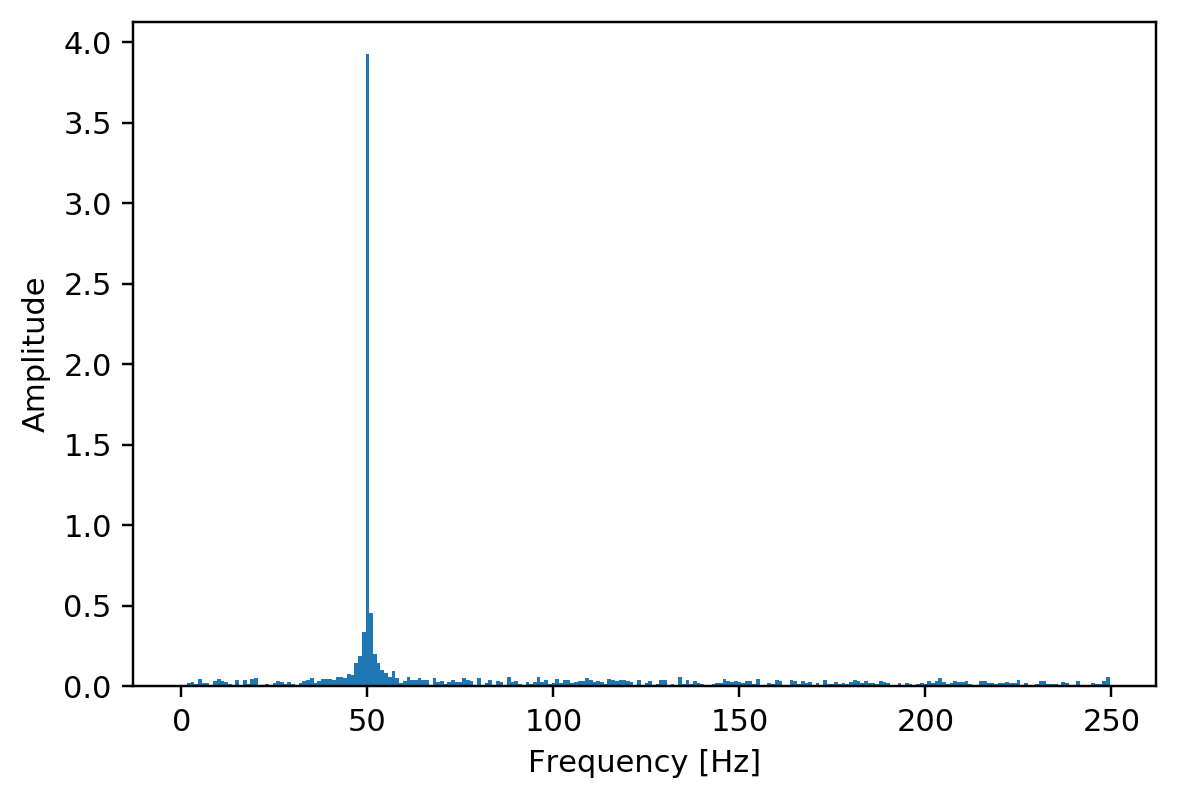

In [3]:
fft = np.fft.fft(signal)
T = t[1] - t[0]  # sampling interval 
N = signal.size

freq_axis = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(freq_axis[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1)  # 1 / N is a normalization factor
plt.show()

## FFT on modulated signal:  

### Simulate a modulated signal

In [56]:
# Constants. 

PI = np.pi

# Discrete time axis. 
signal_duration = 1
t = np.linspace(0, 1, 500)

# Create noise. 
noise_amp = 1
noise = np.random.normal(0,noise_amp,500)

# Create signal.
f = 50
f_m = 10
h = 2.41
phase = PI/2
signal_amp = 8
signal = signal_amp*np.sin(f * 2 * PI * t+ h*np.sin(f_m * 2 * PI * t) + phase )

# Add the noise. 
signal = signal + noise

# Plot.

# plt.ylabel("Amplitude")
# plt.xlabel("Time [s]")
# plt.plot(t, signal)
# plt.show()


### Run an FFT on the signal

In [57]:
fft = np.fft.fft(signal)
T = t[1] - t[0]  # sampling interval 
N = signal.size

freq_axis = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(freq_axis[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1)  # 1 / N is a normalization factor
plt.show()

## FFT on product of two modulated signals:  

### Simulate two modulated signals

In [ ]:
@interact
def show_articles_more_than(column='claps', x=5000):
    return df.loc[df[column] > x]

In [2]:
@interact
def create_signal(f = (1,50,1), f_m = (1,10,1), h = (0,10,.1)):
    # Constants. 

    PI = np.pi

    # Discrete time axis. 
    signal_duration = 1
    t = np.linspace(0, 1, 500)

    # Create noise. 
    noise_amp = 1
    noise_1 = np.random.normal(0,noise_amp,500)
    noise_2 = np.random.normal(0,noise_amp,500)

    # Create signal.
#     f = 50
#     f_m = f/f_m_ratio
#     h = 2.41
    signal_1_amp = 5
    signal_2_amp = 5
    signal_1 = signal_1_amp*np.sin(f * 2 * PI * t + h*np.sin(f_m * 2 * PI * t))
    signal_2 = signal_2_amp*np.sin(f * 2 * PI * t - h*np.sin(f_m * 2 * PI * t))

    # Add the noise. 
    signal_1 = signal_1 + noise_1
    signal_2 = signal_2 + noise_2

    # Create the product signal:
    signal = signal_1*signal_2
    fft = np.fft.fft(signal)
    T = t[1] - t[0]  # sampling interval 
    N = signal.size

    freq_axis = np.linspace(0, 1 / T, N)

    plt.ylabel("Amplitude")
    plt.xlabel("Frequency [Hz]")
    plt.bar(freq_axis[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1)  # 1 / N is a normalization factor
    plt.show()

    return 0


interactive(children=(IntSlider(value=25, description='f', max=50, min=1), IntSlider(value=5, description='f_m…

In [87]:
@interact
def create_signal(f = 50, f_m = 10, x=5000):
    return df.loc[df[column] > x]

interactive(children=(Text(value='claps', description='column'), IntSlider(value=5000, description='x', max=15…

In [82]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### Run an FFT on the signal

In [81]:
fft = np.fft.fft(signal)
T = t[1] - t[0]  # sampling interval 
N = signal.size

freq_axis = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(freq_axis[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1)  # 1 / N is a normalization factor
plt.show()